<a href="https://colab.research.google.com/github/Shamshuddeen-nadaf/Deep_Learning_OCR_CNN_LSTM/blob/Shamshuddeen/ocr_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras import layers, models, optimizers

hybrid_model = models.Sequential()

hybrid_model.add(layers.Input(shape=(28, 28, 1)))
hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))

hybrid_model.add(layers.Conv2D(64, (4, 4)))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Reshape(target_shape=(-1, 64)))

hybrid_model.add(layers.LSTM(128, return_sequences=True))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.LSTM(64, return_sequences=False))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Dense(256))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.Dropout(0.5))

hybrid_model.add(layers.Dense(47, activation='softmax'))

hybrid_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Batch images shape: (128, 28, 28, 1)
Batch labels shape: (128, 47)


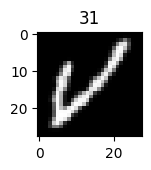

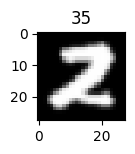

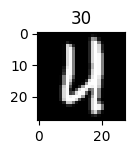

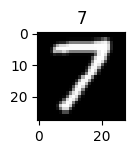

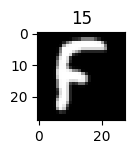

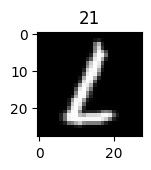

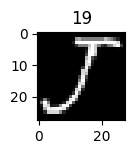

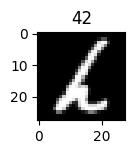

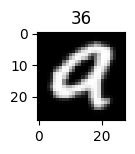

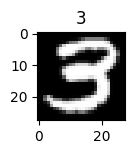

In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def preprocess(image, label):
    image = tf.transpose(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    label = tf.one_hot(label, depth=47)
    return image, label
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
for images, labels in ds_train.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
#print the images

import matplotlib.pyplot as plt

for image,label in ds_train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().squeeze(),cmap='gray')
        plt.title(np.argmax(label[i],axis=0))
        plt.tight_layout()
        plt.show()


In [10]:
history = hybrid_model.fit(ds_train,epochs=15,batch_size=64,validation_data=ds_test)

Epoch 1/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.2977 - loss: 2.4526 - val_accuracy: 0.7981 - val_loss: 0.6103
Epoch 2/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.7775 - loss: 0.6885 - val_accuracy: 0.8425 - val_loss: 0.4680
Epoch 3/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8249 - loss: 0.5269 - val_accuracy: 0.8630 - val_loss: 0.4029
Epoch 4/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8463 - loss: 0.4560 - val_accuracy: 0.8721 - val_loss: 0.3720
Epoch 5/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8554 - loss: 0.4250 - val_accuracy: 0.8771 - val_loss: 0.3567
Epoch 6/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8626 - loss: 0.3993 - val_accuracy: 0.8805 - val_loss: 0.3462
Epoch 7/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8682 - loss: 0.3808 - val_accuracy: 0.8846 - val_loss: 0.3378
Epoch 8/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8726 - loss: 0.3644 - 

In [11]:
hybrid_model.evaluate(ds_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8907 - loss: 0.3126


[0.32379719614982605, 0.8872340321540833]

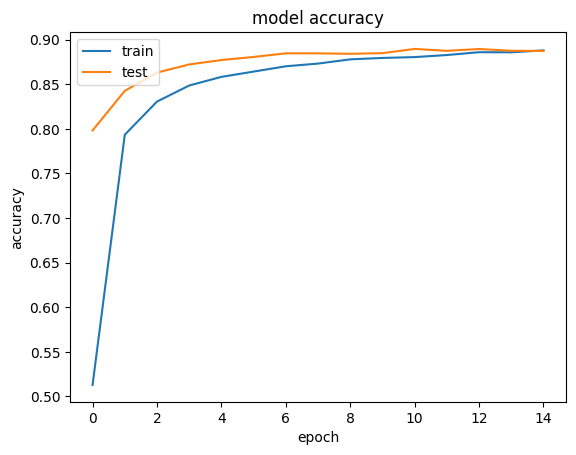

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [14]:
hybrid_model.save('new_hybrid_model.keras')